In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import os
import datetime
# double check before integrating
from scipy import stats
from scipy.stats import kruskal
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df_2019 = pd.read_csv(r"C:\Users\lieblb\OneDrive - Milwaukee School of Engineering\Downloads\Data Science\Intro to Data Science\data\finalProj\run_ww_2019_w.csv")
df_2020 = pd.read_csv(r"C:\Users\lieblb\OneDrive - Milwaukee School of Engineering\Downloads\Data Science\Intro to Data Science\data\finalProj\run_ww_2020_w.csv")

# convert 2019 objects to correct types
df_2019['datetime'] = pd.to_datetime(df_2019['datetime'], format='%Y-%m-%d')
df_2019['gender'] = df_2019['gender'].astype('category')
df_2019['age_group'] = df_2019['age_group'].astype('category')
df_2019['country'] = df_2019['country'].astype('category')
df_2019['major'] = df_2019['major'].astype('category')
df_2019.drop(columns=['Unnamed: 0'], inplace=True)

# convert 2020 objects to correct types
df_2020['datetime'] = pd.to_datetime(df_2020['datetime'], format='%Y-%m-%d')
df_2020['gender'] = df_2020['gender'].astype('category')
df_2020['age_group'] = df_2020['age_group'].astype('category')
df_2020['country'] = df_2020['country'].astype('category')
df_2020['major'] = df_2020['major'].astype('category')
df_2020.drop(columns=['Unnamed: 0'], inplace=True)


## Prep Data
Convert timestamp data to datetime then create single df of all distances with 

In [3]:
# plot dist vs time comparing year, age, and gender
# convert from timestamp object to datetime in m/d format
df_2019['timestamp'] = pd.to_datetime(df_2019['datetime'])
df_2019['year'] = 2019
df_2020['timestamp'] = pd.to_datetime(df_2020['datetime'])
df_2020['year'] = 2020
# combine
df_2019['month_day'] = df_2019['timestamp'].dt.strftime('%m-%d')
df_2020['month_day'] = df_2020['timestamp'].dt.strftime('%m-%d')
df_2019['day_of_year'] = df_2019['timestamp'].dt.dayofyear
df_2020['day_of_year'] = df_2020['timestamp'].dt.dayofyear
df_years = pd.concat([df_2019, df_2020], ignore_index=True)
df_sampled = df_years.sample(frac=0.05, random_state=1)

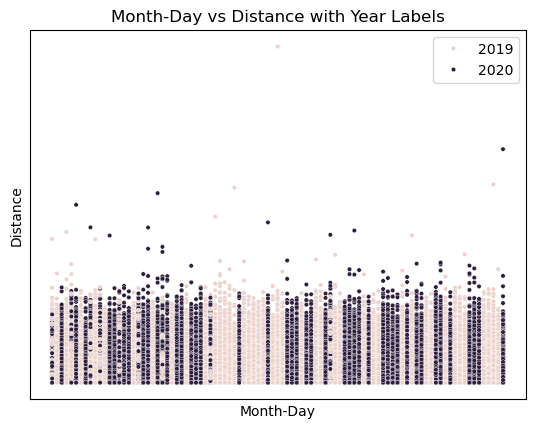

In [4]:
# by year
sns.scatterplot(data=df_sampled, x='month_day', y='distance', hue='year',s=10)
plt.xlabel('Month-Day')
plt.ylabel('Distance')
plt.title('Month-Day vs Distance with Year Labels')
plt.legend(loc='upper right')
plt.xticks([])
plt.yticks([])
plt.show()

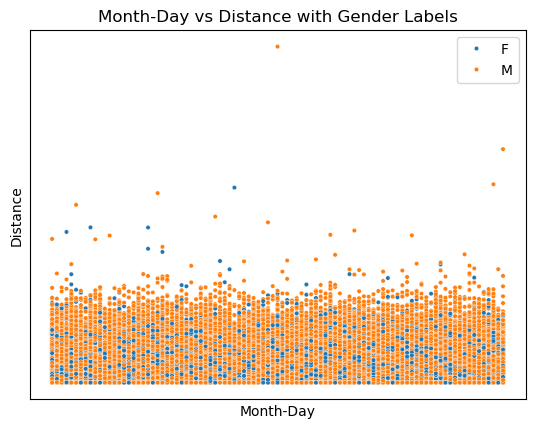

In [5]:
# by gender
sns.scatterplot(data=df_sampled, x='month_day', y='distance', hue='gender',s=10)
plt.xlabel('Month-Day')
plt.ylabel('Distance')
plt.title('Month-Day vs Distance with Gender Labels')
plt.legend(loc='upper right')
plt.xticks([])
plt.yticks([])
plt.show()

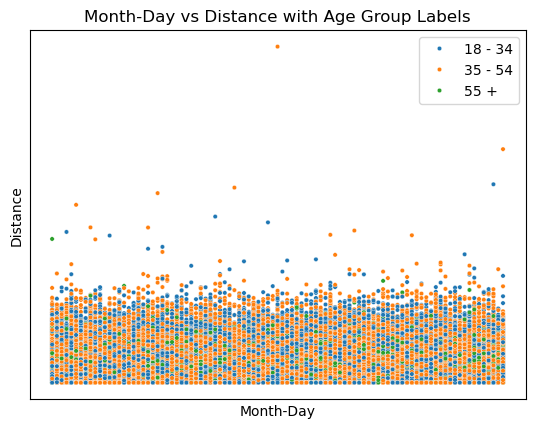

In [6]:
# by age group
sns.scatterplot(data=df_sampled, x='month_day', y='distance', hue='age_group',s=10)
plt.xlabel('Month-Day')
plt.ylabel('Distance')
plt.title('Month-Day vs Distance with Age Group Labels')
plt.legend(loc='upper right')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
#hyp testing:
# mean distances testing between years
t_statistic, p_value_two = stats.ttest_rel(df_2019['distance'],df_2020['distance'])
if p_value_two <= 0.05:
    print('Reject Null: There is a statistical difference between distances run before and during the COVID pandemic')
    if t_statistic > 0:
        p_value_one = p_value_two/2
        if p_value_one <= 0.05:
            print("Reject Null: Mean distance run decreased during the COVID pandemic")
        else:
            print("Fail to Reject Null: Mean distance did not decrease during the COVID pandemic")
    else:
        p_value_one = 1 - (p_value_two/2)
        if p_value_one <= 0.05:
            print("Reject Null: Mean distance run decreased during the COVID pandemic")
        else:
            print("Fail to Reject Null: Mean distance did not decrease during the COVID pandemic")
else:
    print("Fail to Reject Null: There is no statistical difference between distances run before and during the COVID pandemic")

Reject Null: There is a statistical difference between distances run before and during the COVID pandemic
Reject Null: Mean distance run decreased during the COVID pandemic


In [8]:
# testing distance between countries
# used Kruskal-Wallis as I was comparing more than two paired datasets
country_dist = []
df_country = df_years['country']
country_count = df_country.value_counts()
for countries in country_count.index:
    df_portion =  df_years[df_years['country'] == countries]
    country_dist.append(df_portion['distance'])
stat, p_value = kruskal(*country_dist)
if p_value <= 0.05:
    print("Reject Null: There is a significant difference in distances run by country")
else:
    print("Fail to Reject Null: No significant difference between distances run by country")

Reject Null: There is a significant difference in distances run by country


In [9]:
# mean distance by age group
# same situation as country
age_dist = []
df_country = df_years['country']
age_count = df_country.value_counts()
for ages in age_count.index:
    df_portion =  df_years[df_years['age_group'] == ages]
    age_dist.append(df_portion['distance'])
stat, p_value = kruskal(*age_dist)
if p_value <= 0.05:
    print("Reject Null: There is a significant difference in distances run by age group")
else:
    print("Fail to Reject Null: No significant difference between distances run by age group")

Fail to Reject Null: No significant difference between distances run by age group


In [10]:
# mean distance by gender
male_df = df_years[df_years['gender']=="M"]
female_df = df_years[df_years['gender']=="F"]
stat, p_value = kruskal(male_df['distance'],female_df['distance'])
if p_value <= 0.05:
    print("Reject Null: There is a significant difference in distances run by gender")
else:
    print("Fail to Reject Null: No significant difference between distances run by gender")

Reject Null: There is a significant difference in distances run by gender
